#Tracker RAT HEXMAZE

##ATTENTION! Google Colab free version has a maximum usage of 12 hours. Please, disconnect or close this notebook every time you finish to track the videos to avoid the temporary blockage of Colab. 

###Possible errors and solutions can be found at the end of this notebook.






##>>>>  Requirements

###>> Google Drive account with:
### 1) At least 2GB of free space available, 5GB are needed if tracking Ephys sessions. If needed, you can create a new Google account to use only for tracking purposes. In this case you will have 15GB for free.
### 2) 2 folders, videos and logs where the output files will be saved. The 2 folders can be created either in MyDrive, or in another folder inside MyDrive(e.g. in MyDrive/tracking). In the latter case, check the path after -o in the line that run the tracker and change it accordingly. 
### 3) ModelWeights.rar file in your Google Drive (path to file will be drive/MyDrive/ModelWeights.rar). This file contains the model weights in .onnx format. 


###>> Check if the Notebook Setting are set correctly and Google Colab is connected to a GPU. Go under Tracker_Colab 2.0.ipynb in the upper left section of this page and click on Edit >  Notebook settings and check if everything is set as in the picture below.



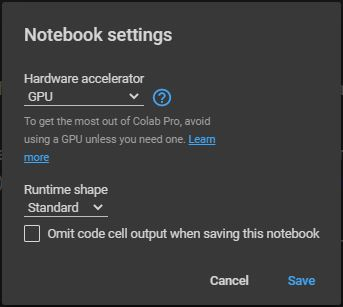

##>>>> Set up environment 

###>> Run the cell below again if you disconnect from GoogleColab. 

###>> If you already run it and you're still connect, you can track the next video running oly the cell Run Tracker below. You can check if your environment is already set clicking on the folder on the right and checking if the folders drive and TrackerColab are present. See explanatory picture below.

###Example environment not set. Run the Set up envoronment cell before running the Tracker.

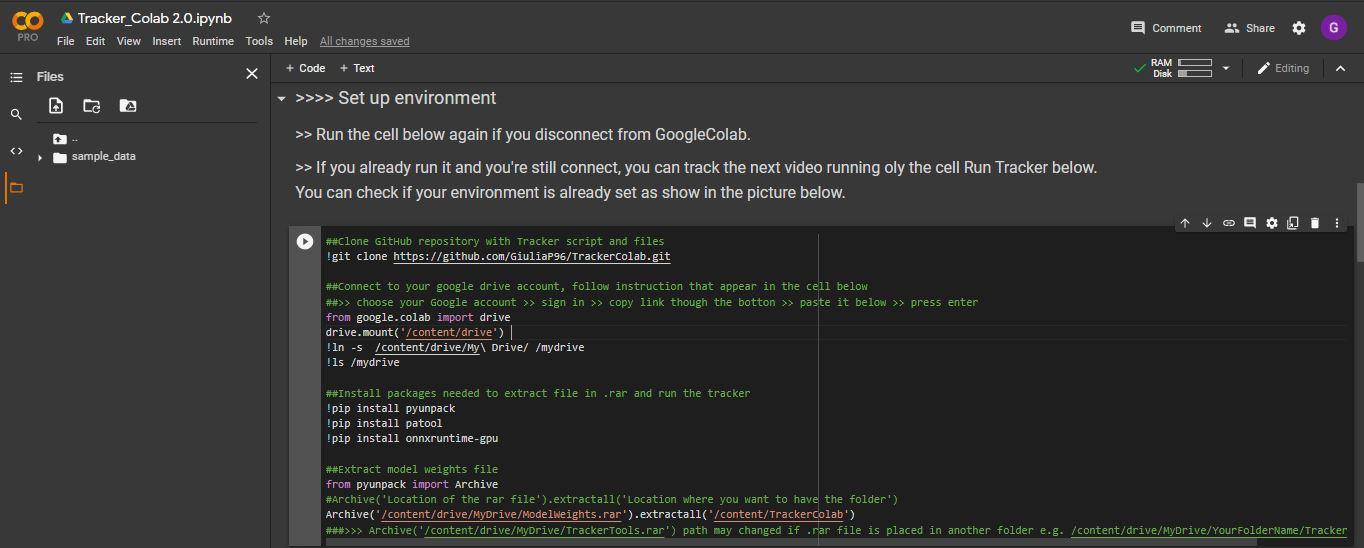

###Example environment already set. In this case do NOT run the Set up environment cell, run the Run Tracker cell only.
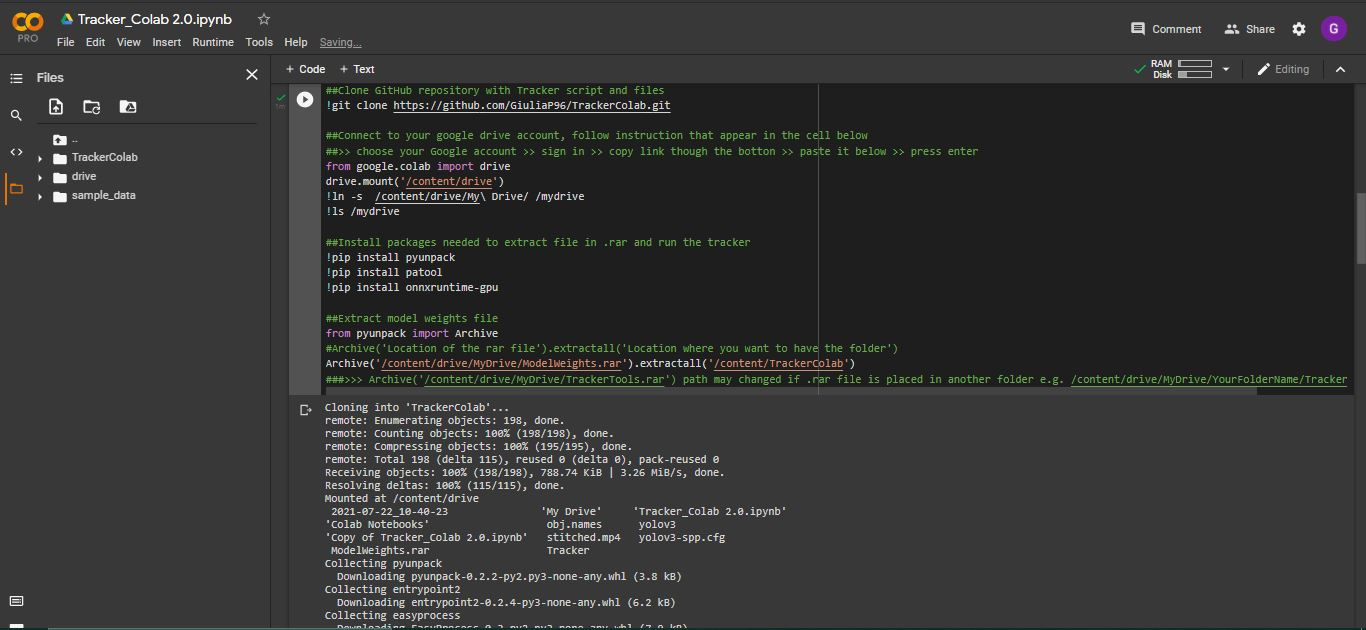

In [ ]:
##Clone GitHub repository with Tracker script and files 
!git clone https://github.com/GiuliaP96/TrackerColab.git  

##Connect to your google drive account, follow instruction that appear in the cell below
##>> choose your Google account >> sign in >> copy link though the botton >> paste it below >> press enter
from google.colab import drive                            
drive.mount('/content/drive') 
!ln -s  /content/drive/My\ Drive/ /mydrive  
!ls /mydrive

##Install packages needed to extract file in .rar and run the tracker
!pip install pyunpack                                     
!pip install patool
!pip install onnxruntime-gpu

##Extract model weights file 
from pyunpack import Archive                              
#Archive('Location of the rar file').extractall('Location where you want to have the folder') 
Archive('/content/drive/MyDrive/ModelWeights.rar').extractall('/content/TrackerColab') 
###>>> Archive('/content/drive/MyDrive/TrackerTools.rar') path may changed if .rar file is placed in another folder e.g. /content/drive/MyDrive/YourFolderName/TrackerTools.rar

Cloning into 'TrackerColab'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 198 (delta 115), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (198/198), 788.74 KiB | 3.09 MiB/s, done.
Resolving deltas: 100% (115/115), done.
Mounted at /content/drive
 2021-07-22_10-40-23		   'My Drive'	  'Tracker_Colab 2.0.ipynb'
'Colab Notebooks'		    obj.names	   yolov3
'Copy of Tracker_Colab 2.0.ipynb'   stitched.mp4   yolov3-spp.cfg
 ModelWeights.rar		    Tracker
     |████████████████████████████████| 77 kB 4.5 MB/s 
     |████████████████████████████████| 31.3 MB 139 kB/s 


## Run tracker 


### >> -i path to the input video (eg. -i drive/MyDrive/stitched.mp4)
### >> -o path to the folder with the folders logs and videos (e.g. -o drive/MyDrive/NameofYourFolder, YourFolder contains the folders logs and videos)
### >> The tracker will print 'Session ended' and automatically stop when the video ends. The output files (.mp4, .log, .txt) can be found in your google drive (path to session's files: drive/MyDrive/NameofYourFolder/logs and drive/MyDrive/NameofYourFolder/videos, e.g. in the case below the NameofYourFolder is Tracker)

###>> Every time you run the tracker, it will ask to enter the session information (only at the beginning of each new session you want to track). 
###>> The tracker will ask to enter:  

1. Rat ID number
2. Date of trial (format yearmonthday, eg. 20210130)
3. How many trials in the session (eg. 23)
4. Type of first trial/or session (eg. '1' :normal training, '2' :new goal location, '3' :Probe trial, '4' :Ephys special training sesssion)
5. Code number of goal and starting nodes (eg. 406, 113, etc.)
6. In case of Ephys training (training type '4'), it will ask the number of the trials in the sessions that lasted 10 minutes. Enter the trial number and press enter (eg. '10', press enter, '23' press enter. The first trial is already set to 10 minutes so you can avoid to enter '1'), or click just Enter (the box will be empty) when finish. 

The tracker will print a summary of the info you entered and then automatically starts. You can now let it run in the background (see below how to keep it running without automatically disconnecting after 20 minutes).  

###>> How to check the tracking process 

1. Checking proximity... - tracker is waiting for the researcher to appear on screen after the goal location is reached. After the proximity is checked it will try to detect the rat in the starting node of the next trial (this process is skipped for the first trial).

2. Waiting start next trial : n . Start node: X - the tracker is waititng for the rat to be placed in the next starting node.

3. Trial n - the trial started. You can see on screen the node where the rat is currently detected, its coordinate on video, time of video and speed of the tracking process (FPS)

4. Session ended with n trials. All trials have been tracked successfully. The tracker will wait until the end of the video and then automatically stopped printing the total duration of the tracking process. Now you can check the output files in your Google drive folder.


In [ ]:
##### Run the tracker. Format -i path of video input to be tracked, -o path to folder /logs and /videos in Google drive
%cd /content/TrackerColab/       
!python /content/TrackerColab/TrackerYolov3-Colab.py -i /content/drive/MyDrive/stitched.mp4 -o /content/drive/MyDrive/Tracker 
####can be changed e.g. /content/drive/MyDrive/YourFolderName [other folders paths will be /content/drive/MyDrive/NameofyourFolder/logs and /content/drive/MyDrive/NameofyourFolder/videos]

/content/TrackerColab

Video path /content/drive/MyDrive/stitched.mp4 Logs output /content/drive/MyDrive/Tracker


Tracker version: v2.00



>> Enter rat number: 5

>> Enter date of trial: 20210831

>> Enter num total trials: 1

>> Enter session GOAL node (num): 211

>> Enter first trial type [1]-Normal [2]-New GoaL Location [3]-Probe [4]-Special(Ephys): 1

> Enter START node(num) of trial 1: 123

 -Network loaded-  <onnxruntime.capi.onnxruntime_inference_collection.InferenceSession object at 0x7f3a4030c450>

  ________  SUMMARY SESSION  ________  

Path video file: /content/drive/MyDrive/Tracker/videos/20210831_Rat5.mp4

Path .log and .txt files: /content/drive/MyDrive/Tracker/logs/20210831_Rat5.txt

Total trials current session: 1 

Goal location node  211

Start node trial 1  123 location (891, 265)

Creating log files...

Starting video.....


 00:00:0.000 
 >>> Waiting Start Next Trial:  1  Start node: 123

 00:00:0.000 
 >>> Waiting Start Next Trial:  1  Start node: 123

 00:00:0

##Prevent Colab to automatically disconnect (avoid stop of tracking). 

##It can happen if it does not detect activity (e.g. mouse click) for 30 minutes.

###Ctrl+ Shift + i to open inspector view . Then go to console (highlight in green box) and copy paste cell starting with function ClickConnect() inside the yellow box. Then click enter. See cell below for explanatory picture. 

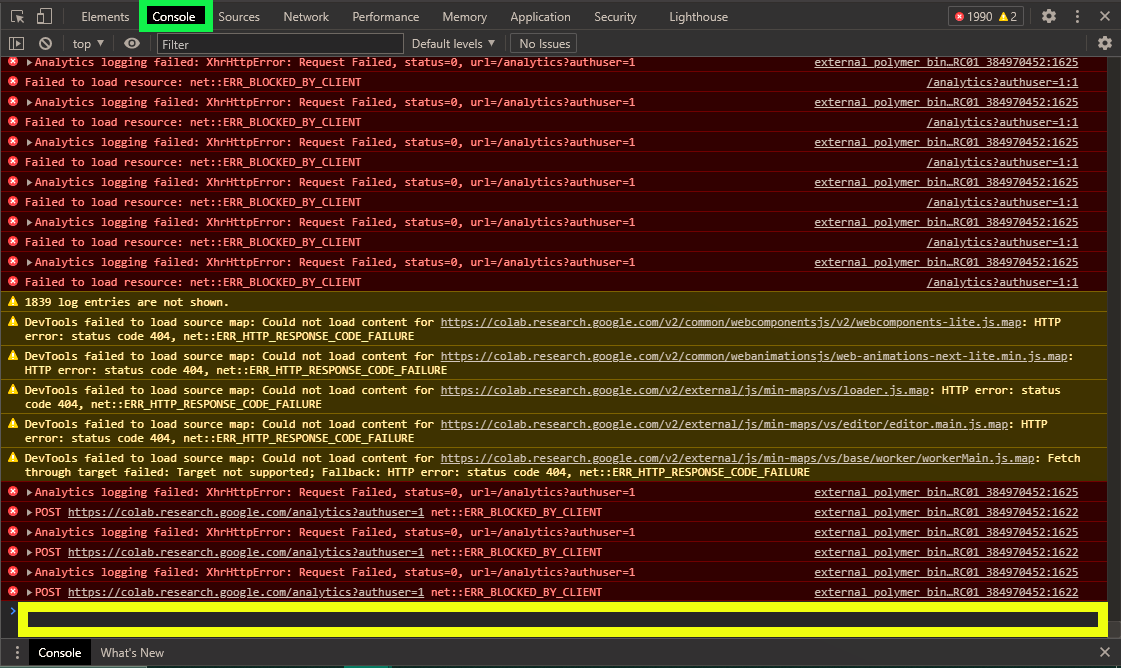

In [ ]:
##Copy lines below
function ClickConnect() {
  console.log('Working')
  document
    .querySelector('#top-toolbar > colab-connect-button')
    .shadowRoot.querySelector('#connect')
    .click()
}
intervalTiming = setInterval(ClickConnect, 60000)

In [ ]:
##EXTRA

##Copy paste line below in the same box to stop the automatic click when tracking is finished [closing this notebook will reset it anyway]
clearInterval(intervalTiming)

##Troubleshooting - Errors and how to solve them

Google Colab free version has a maximum usage of 12 hours. Please, disconnect or close this notebook every time you finish to track the videos to avoid the temporary blockage of Colab (you can still use this notebook but without running the tracker). 

###-Cannot connect to GPU backend
If the message 'Cannot connect to GPU backed' appears, you can create a new Google account and upload a copy of this notebook to the new account. Opening this notebook with the new account will give you 12 extra hours of usage. Then, you can always switch back to the other account (the output files can always be saved in your preferred Google drive account, so you can connect to the temporarely blocked account through the cell above without problems). 

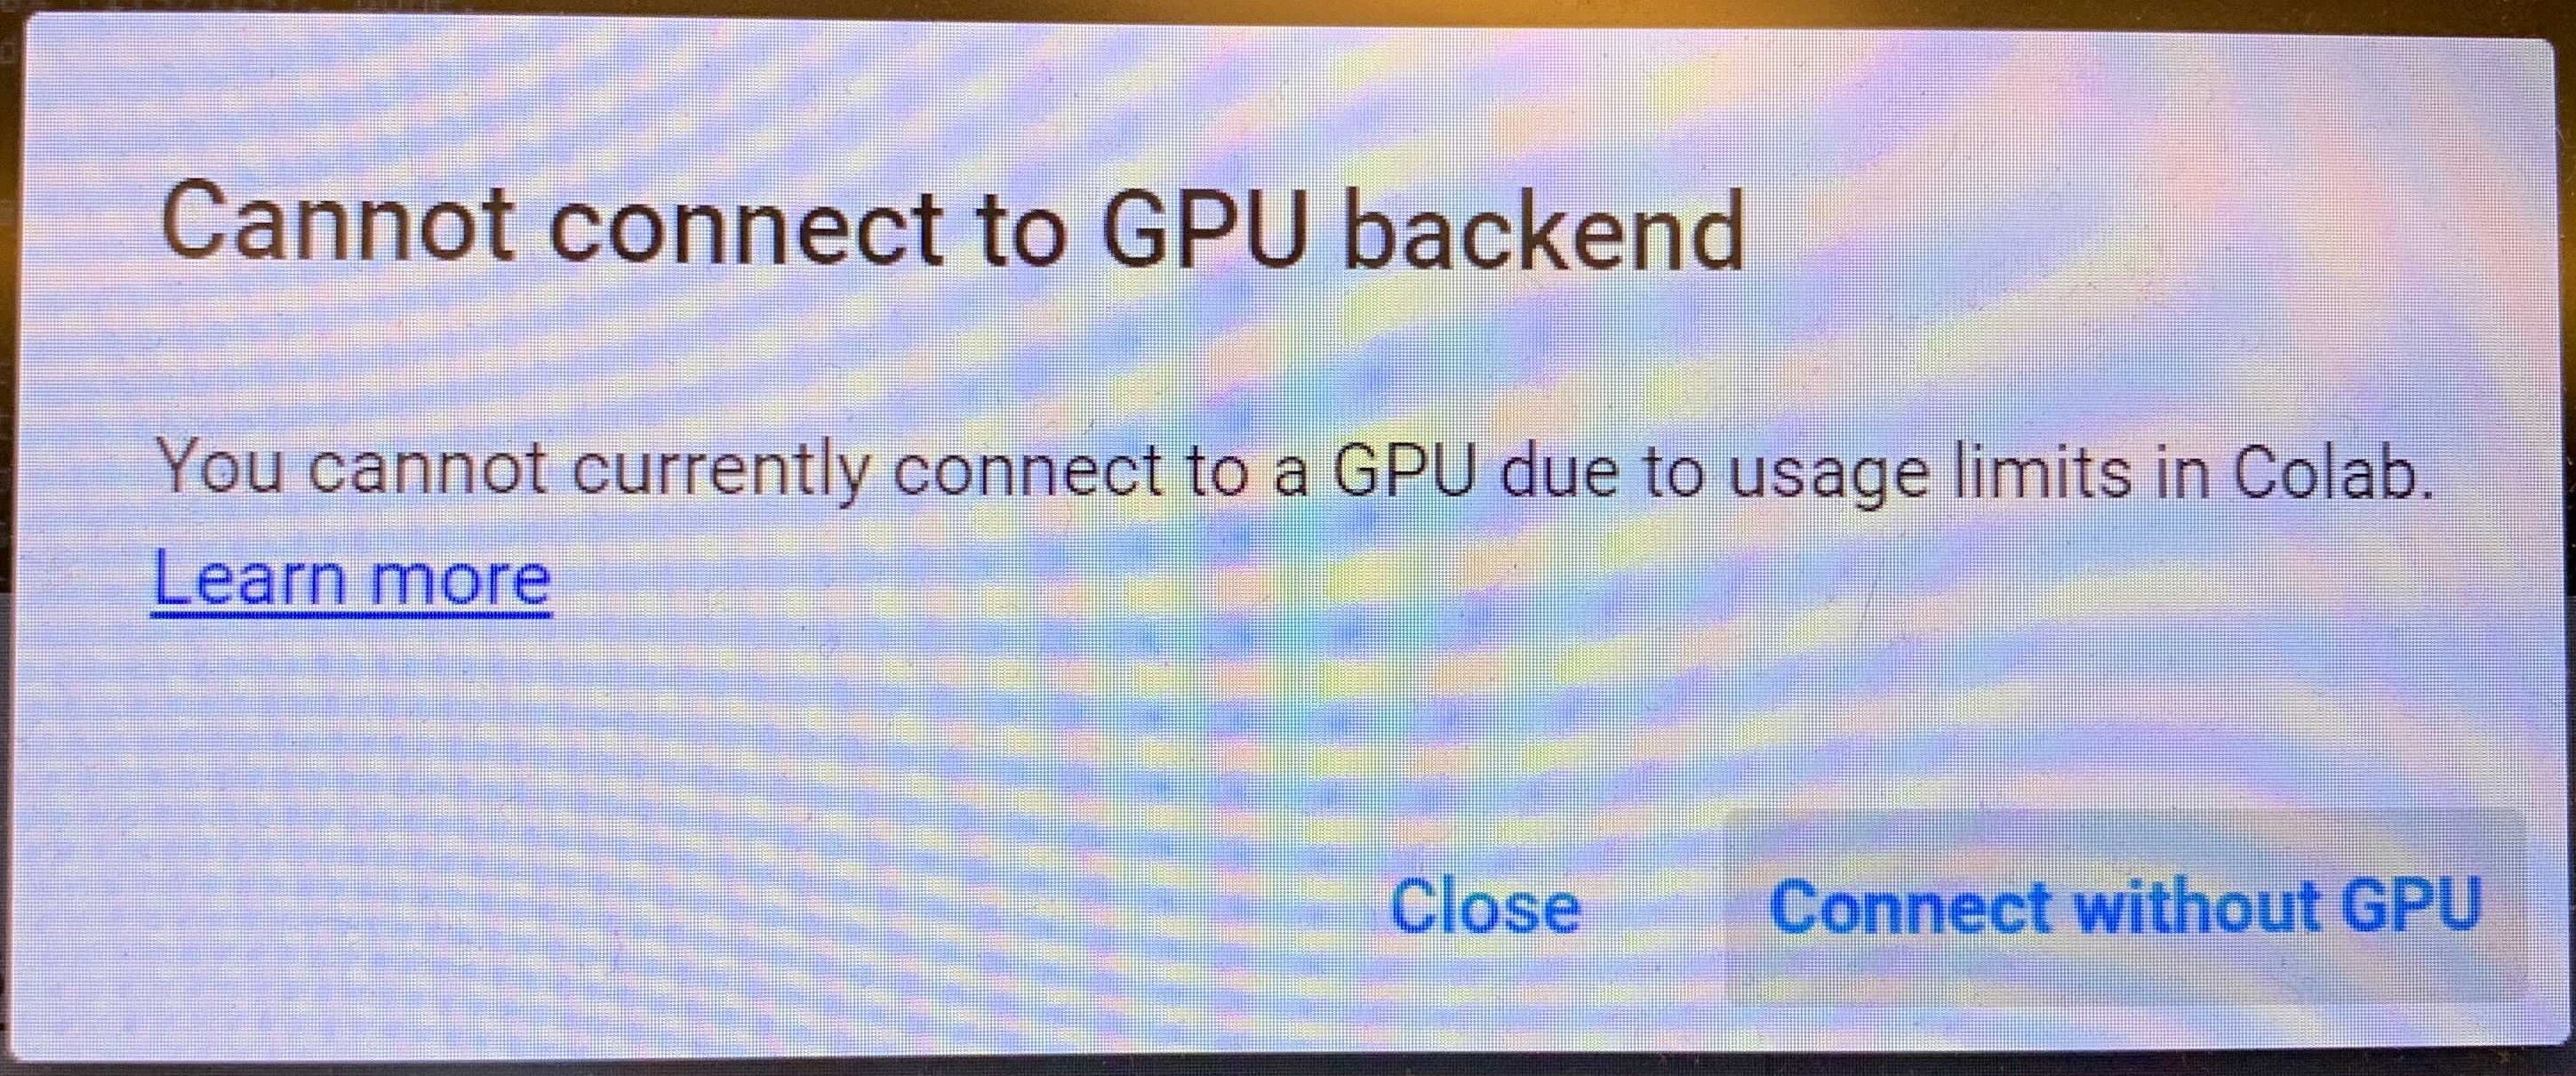

###-RuntimeError

If the error below appears Colab is not connected to a CPU. 
To switch to CPU mode go in the upper panel to the left and go to > Edit > Notebook settings > Hardware accelerator and change None to GPU. 

Check also that the 'Omit code cell output when saving this notebook' is unticked/disabled.

Run the cell below the error example to check that the CPU is now activated and connected.


In [ ]:
##Example error CPU connection
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/content/TrackerColab/TrackerYolov3-Colab.py", line 101, in load_network
    self.session = onnxruntime.InferenceSession(onnx_weights_path)
  File "/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py", line 283, in __init__
    self._create_inference_session(providers, provider_options, disabled_optimizers)
  File "/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py", line 321, in _create_inference_session
    sess.initialize_session(providers, provider_options, disabled_optimizers)
RuntimeError: /onnxruntime_src/onnxruntime/core/providers/cuda/cuda_call.cc:121 bool onnxruntime::CudaCall(ERRTYPE, const char*, const char*, ERRTYPE, const char*) [with ERRTYPE = cudaError; bool THRW = true] /onnxruntime_src/onnxruntime/core/providers/cuda/cuda_call.cc:115 bool onnxruntime::CudaCall(ERRTYPE, const char*, const char*, ERRTYPE, const char*) [with ERRTYPE = cudaError; bool THRW = true] CUDA failure 100: no CUDA-capable device is detected ; GPU=-1258944768 ; hostname=5f33720ec59f ; expr=cudaSetDevice(info_.device_id); 

Run the cell below the error example to check that the CPU is now activated and connected.

In [ ]:
##In the case there is no GPU go to Edit > Notebook settings and change None to GPU
!nvidia-smi
# CUDA: check which version of Nvidia CUDA drivers are already pre-installed
##In the case there is no GPU go to Edit > Notebook settings and change None to GPU
!/usr/local/cuda/bin/nvcc --version

###-FileNotFoundError 

The error below can be solved changing the path after -i in the command line that run the tracker. This must be the path to the folders logs and videos in your Google Drive. 

In the example below my folders are in the folder Tracker, so I will change the command line like below

!python /content/TrackerColab/TrackerYolov3-Colab.py -i /content/drive/MyDrive/stitched.mp4 -o /content/drive/MyDrive/Tracker 

In [ ]:
##Example error file path
Traceback (most recent call last):
  File "/content/TrackerColab/TrackerYolov3-Colab.py", line 622, in <module>
    Tracker(vp = args.vid_path, nl = node_list, out = args.output)       
  File "/content/TrackerColab/TrackerYolov3-Colab.py", line 86, in __init__
    fh = logging.FileHandler(str(logfile_name))
  File "/usr/lib/python3.7/logging/__init__.py", line 1087, in __init__
    StreamHandler.__init__(self, self._open())
  File "/usr/lib/python3.7/logging/__init__.py", line 1116, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding)
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/logs/log_2021try_Rat5.log'